# Demo: Regression

In [1]:
#Load dataset
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

df_bos = pd.DataFrame(boston.data)

df_bos.columns = boston.feature_names
df_bos['PRICE'] = boston.target

df_bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
# Train test split
from sklearn.model_selection import train_test_split
X = df_bos.drop('PRICE', axis=1)
y = df_bos['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [4]:
# Linear regression model
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

Text(0.5,1,'Prices vs Predicted prices')

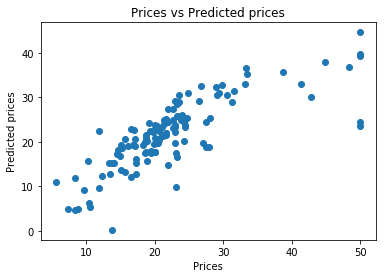

In [5]:
# Visualize result using matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

29.790559164238513


In [7]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6353620786674619

In [8]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(y_test, y_pred)
print(mse)

3.669217386602829


In [9]:
# Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

36.64110208622718
0.5515110936187517
4.030452183377583


In [10]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

30.513632729367547
0.6265116223767433
3.666085406790568


In [11]:
#Grid search for best model and parameters
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.01, 0.1, 1, 10, 100, ]}

grid_search = GridSearchCV(estimator =ridge,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

#here is the best accuracy
print(best_accuracy)
print(best_parameters)

0.7216647408308825
{'alpha': 0.01}


In [12]:
#Support vector regression
from sklearn.svm import SVR
svr = SVR(kernel='rbf', 
          C=1, 
          gamma=0.1)

svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

81.711030016073
-0.00014705903097733675
5.975683955601893


In [13]:
# Decision tree regression
from sklearn.tree import DecisionTreeRegressor  
dt = DecisionTreeRegressor()  

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

28.96740157480315
0.6454375683783475
3.3811023622047243


In [14]:
# Gradient Boosting Decision Tree regression
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

22.831828206837546
0.7205372906341129
2.877346309873172


# Clustering

In [15]:
# replace path with the path to disnetes.csv of your computer
path = "C:\\Users\\Duo\\Downloads\\shopping_data.csv"

# read_csv function of pandas
customer_data = pd.read_csv(path)
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


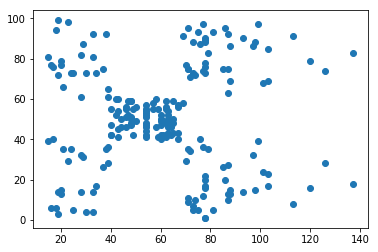

In [16]:
# Use Annual Income and Spending Score
data = customer_data.iloc[:, 3:5].values
plt.scatter(data[:,0], data[:,1], label='True Position')  

In [17]:
# K means
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=5, random_state=0)  

# Note we are not using any 'labels', we only use the data itself
kmeans.fit(data)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [18]:
# result of the clustering
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

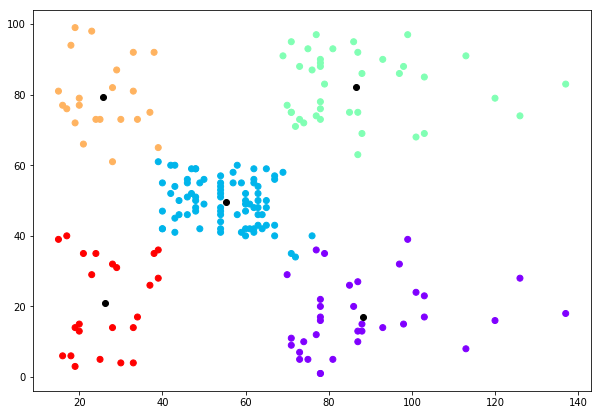

In [19]:
# plot for result of the k means clustering 
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

In [20]:
from sklearn import metrics
metrics.silhouette_score(data, kmeans.labels_, metric='euclidean')

0.553931997444648

In [21]:
# a function for boxplot of corresponding clusters
import numpy as np

def plot_for_cluster(i):
    index = np.where(kmeans.labels_ == i)[0].tolist()
    df = pd.DataFrame(data[index,:], columns=[['Annual Income', 'Spending Score']])
    return df.boxplot()

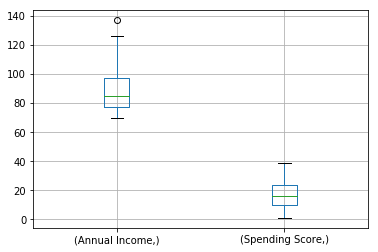

In [22]:
plot_for_cluster(0)

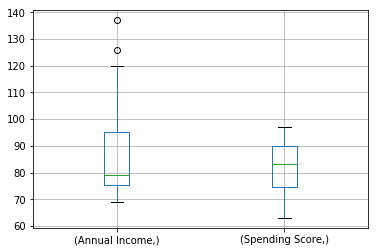

In [23]:
plot_for_cluster(2)

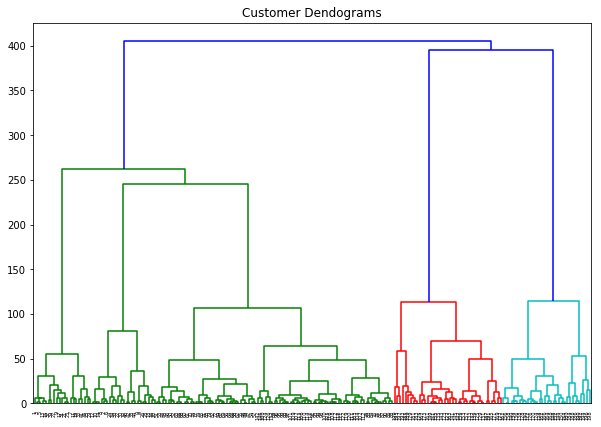

In [24]:
# HCA using scipy
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

In [25]:
# HCA using sklearn
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)  

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

# PCA

In [26]:
# Standarization before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [27]:
X_std.mean()

-1.5716626338263086e-16

In [28]:
X_std.std()

1.0

In [29]:
from sklearn.decomposition import PCA
# Define reduced to how many dimensions
pca = PCA(n_components=7)

# Apply dimensionality reduction on X_std, the transfored values of a sample called the sample's PCA score
scores = pca.fit_transform(X_std)

In [30]:
X_std.shape

(506, 13)

In [31]:
scores.shape

(506, 7)

In [32]:
# Explained variances of each components
pca.explained_variance_ratio_

array([0.47097344, 0.11015872, 0.09547408, 0.06598453, 0.0641974 ,
       0.05074235, 0.04146288])

In [33]:
# PCA components or loading, i.e. weights on every features of the original data 
pc_1 = pca.components_[0]
display(pc_1)

pc_2 = pca.components_[1]
print(pc_2)

array([ 0.24959319, -0.25652131,  0.3468611 ,  0.005099  ,  0.34297566,
       -0.18943673,  0.31385097, -0.32173451,  0.31981745,  0.33853899,
        0.20502118, -0.20273245,  0.30984085])

[-0.31318631 -0.32130825  0.11181554  0.45672596  0.21985693  0.15387677
  0.31174761 -0.34918069 -0.2703984  -0.23885931 -0.30870354  0.23495727
 -0.07598235]


# Isolation forest

In [34]:
# Isolation forest

# Manually create some abnormal data
X_iForest = X.values
X_iForest[100:110, :] = X_iForest[100:110, :] + 3 * X.values[:,:].std()

In [35]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=200, max_samples='auto', random_state=0)
clf.fit(X_iForest)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=200, n_jobs=1, random_state=0,
        verbose=0)

In [36]:
# anomaly score, low socre means high anomalies
scores_pred = clf.decision_function(X_iForest)
scores_pred[:10]

array([0.0802941 , 0.11021246, 0.10254316, 0.08931004, 0.09590605,
       0.10180062, 0.11027567, 0.08490315, 0.04221224, 0.08850804])

In [37]:
# Predicted normal (1) or abnormal (-1)
pred = clf.predict(X_iForest)
pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

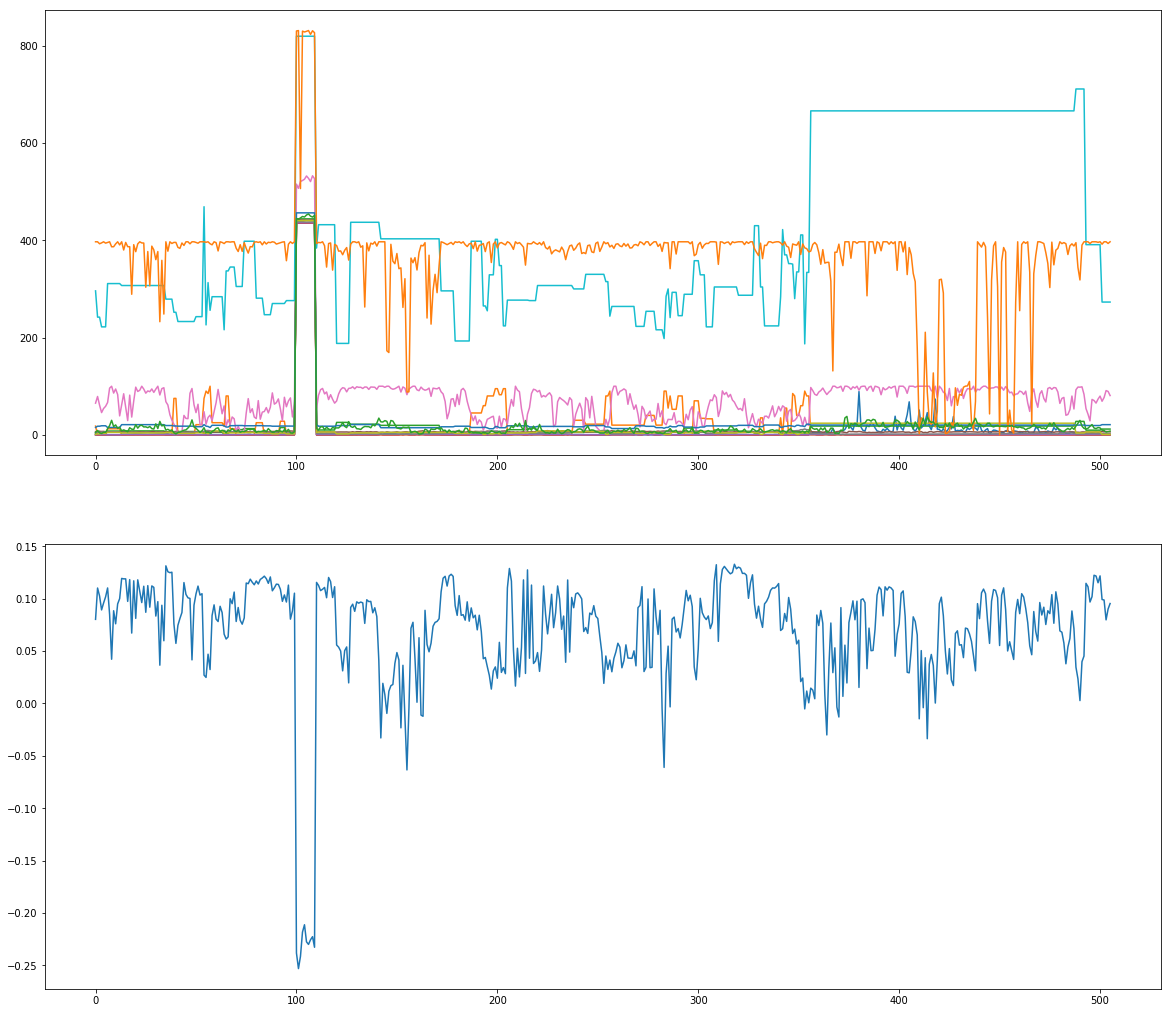

In [38]:
%matplotlib inline

plt.figure(1, figsize=(20, 18))
plt.subplot(211)
plt.plot(X_iForest)

plt.subplot(212)
plt.plot(scores_pred)